Epoch 1/5


c:\Users\USER\Desktop\Pvt\Anjana\credit_card_fraud\ccd-venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15986/16000 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.9793
Epoch 1: val_loss improved from inf to 0.06119, saving model to cnn_ann_model.h5
16000/16000 [==============================] - 21s 1ms/step - loss: 0.2425 - accuracy: 0.9793 - val_loss: 0.0612 - val_accuracy: 0.9872
Epoch 2/5
15995/16000 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9865
Epoch 2: val_loss did not improve from 0.06119
16000/16000 [==============================] - 20s 1ms/step - loss: 0.0645 - accuracy: 0.9865 - val_loss: 0.0614 - val_accuracy: 0.9890
Epoch 3/5
15997/16000 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.9873
Epoch 3: val_loss improved from 0.06119 to 0.05892, saving model to cnn_ann_model.h5
16000/16000 [==============================] - 20s 1ms/step - loss: 0.0613 - accuracy: 0.9873 - val_loss: 0.0589 - val_accuracy: 0.9876
Epoch 4/5
15980/16000 [============================>.] - ETA: 0s - loss: 0.0611 - accuracy: 

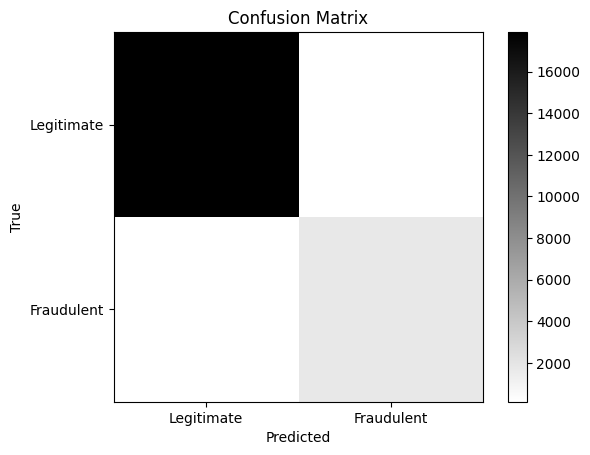

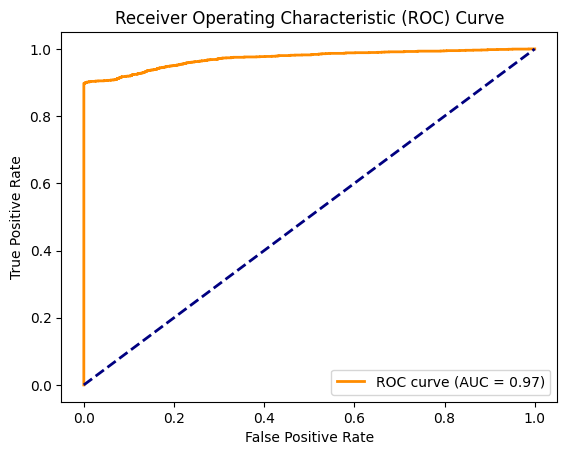

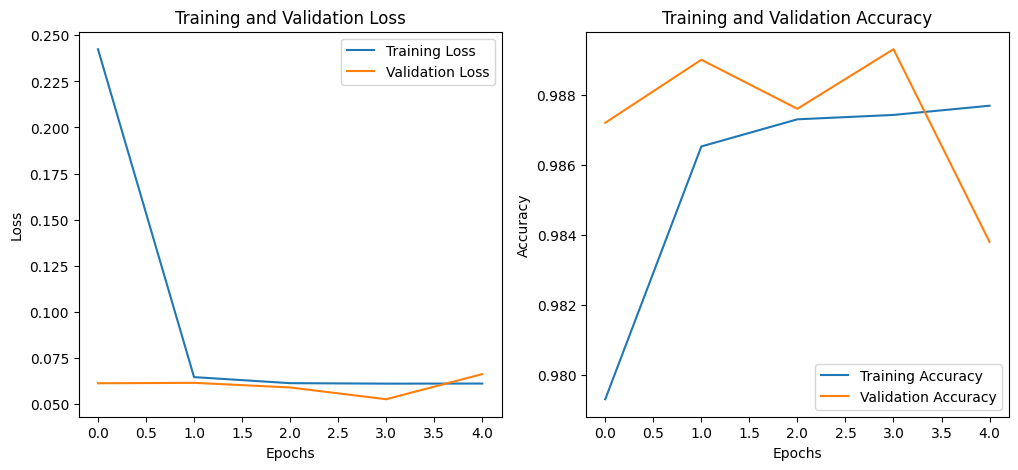

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the data from the CSV file
data = pd.read_csv('sample_Datasets.csv')

# Split the data into features (X) and labels (y)
X = data.drop(['Fraudulent'], axis=1)
y = data['Fraudulent']

# One-hot encode the categorical features
enc = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(enc.fit_transform(X.select_dtypes(include=['object'])))
X_encoded.columns = enc.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X = X.drop(X.select_dtypes(include=['object']).columns, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to float format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Reshape the data for input to CNN
X_train = np.expand_dims(X_train.values, axis=-1)
X_test = np.expand_dims(X_test.values, axis=-1)

# Define the CNN-ANN architecture
model = Sequential()
model.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  # Additional Dense layer for ANN
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint('cnn_ann_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model on the testing data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions using the model
y_pred = model.predict(X_test)

# Compute the confusion matrix, ROC curve, and classification report
cnf_matrix = confusion_matrix(y_test, y_pred.round())
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(classification_report(y_test, y_pred.round()))


# Plot the confusion matrix
plt.imshow(cnf_matrix, cmap='binary', interpolation='None')
plt.colorbar()
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.yticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
